# Introduction: Average Temperature within the USA: 1895 - 2016
With this project I plan to take the average temperature within the contiguous United States of America from 1895 - 2016 to provide a quick analysis and visual representation of the change.

## Methods:
This project will involve gathering the data, filtering out irrelevant data, cleaning out any likely errors and performing descriptive statistical analysis. I will be utilizing the following Python packages to accomplish my goals:
<li>Pandas: Provides structure to the data in the form of Data Frames
<li>Numpy: Provides arrays
<li>Matplotlib: Provides data visualization capability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Data:
Data will be obtained from the following source: https://www.ncdc.noaa.gov/ <br>
The data will not be in a "ready to go" format as you can see below. This will require cleaning (column creation, re-indexing, data type reformatting)

In [2]:
df = pd.read_csv('U.S., Average Temperature, January-December.csv')
df

,Contiguous U.S.,Average Temperature,January-December
0,Units: Degrees Fahrenheit,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN
2,Missing: -99,NaN,NaN
3,Date,Value,Anomaly
4,189512,50.34,-1.68
...,...,...,...
121,201212,55.28,3.26
122,201312,52.43,0.41
123,201412,52.54,0.52
124,201512,54.40,2.38


In [3]:
#Create new columns, populate columns with data from the preceeding data frame 
df.columns = ['date', 'temperature (F)', 'anomaly']
df = df.loc[4:,('date','temperature (F)')]
df = df.reset_index(drop = True)
df

,date,temperature (F)
0,189512,50.34
1,189612,51.99
2,189712,51.56
3,189812,51.43
4,189912,51.01
...,...,...
117,201212,55.28
118,201312,52.43
119,201412,52.54
120,201512,54.40


In [4]:
#Check data types
df.dtypes

date               object
temperature (F)    object
dtype: object

In [5]:
#Convert temperature to float from string object
df['temperature (F)'] = df['temperature (F)'].astype(float)
df['temperature (F)'].dtype

dtype('float64')

## Data Analysis

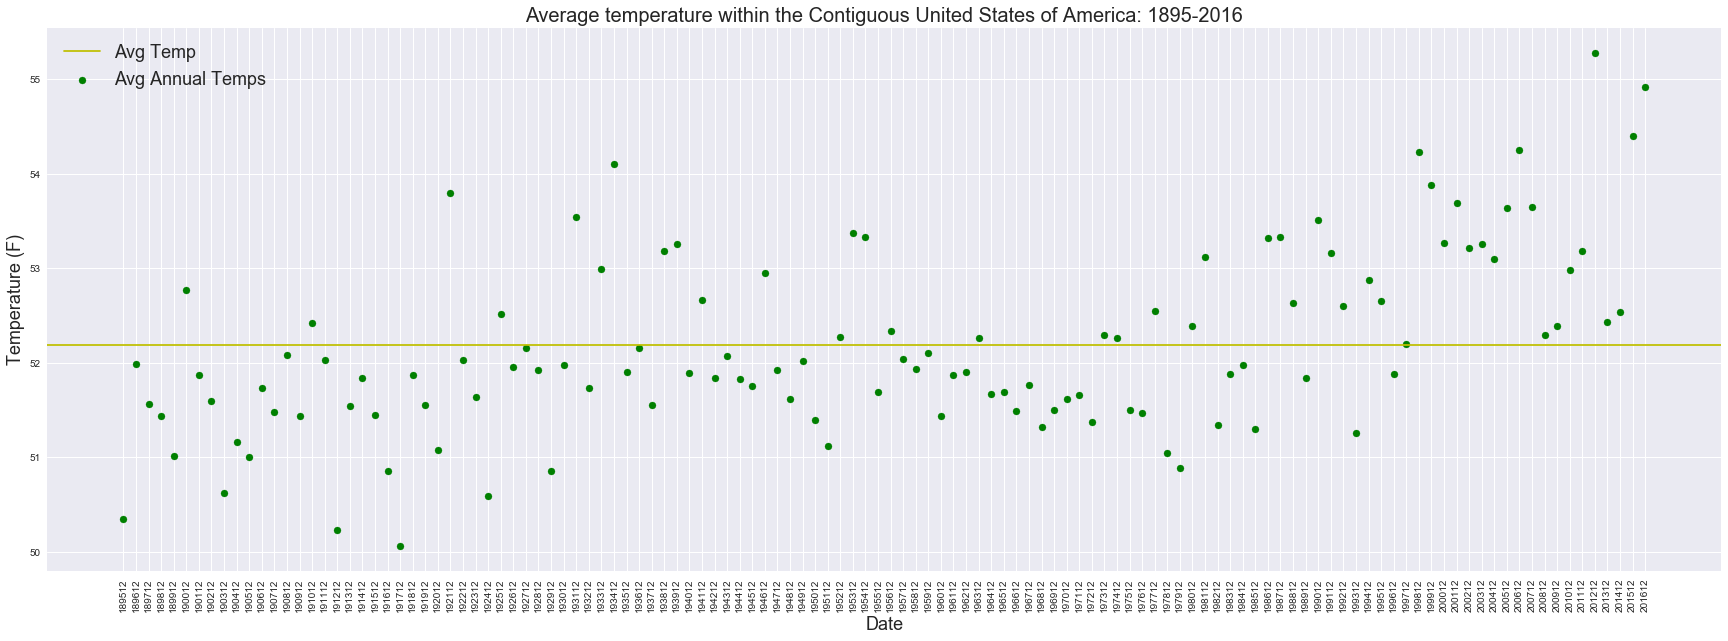

count    122.000000
mean      52.182705
std        0.967924
min       50.060000
25%       51.550000
50%       51.960000
75%       52.742500
max       55.280000
Name: temperature (F), dtype: float64

In [9]:
#Scatter plot with a line representing the mean
x = df['date']
y = df['temperature (F)']
meanTemp = y.mean()
plt.scatter(x,y, color = 'g', label = 'Avg Annual Temps')
plt.axhline(meanTemp, color = 'y', label = 'Avg Temp')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Temperature (F)', fontsize = 18)
plt.rcParams['figure.figsize'] = 30,10
plt.title('Average temperature within the Contiguous United States of America: 1895-2016', fontsize = 20)
plt.xticks(rotation = 90)
plt.legend(fontsize=18)
plt.show()

#Descriptive summary of the temperature series 
df['temperature (F)'].describe()



In [7]:
meanT = df['temperature (F)'].mean()

filtA = (df['temperature (F)'] > meanT)
filtB = (df['temperature (F)'] < meanT)
filtC = (df['temperature (F)'] < meanT) & (df['date'] >= '199012') & (df['date'] <= '201612')
filtD = (df['temperature (F)'] > meanT) & (df['date'] >= '199012') & (df['date'] <= '201612')


yrsAboveMean = df[filtA]['temperature (F)'].count()
yrsBelowMean = df[filtB]['temperature (F)'].count()
yrsBelow19902016 = df[filtC]['temperature (F)'].count()
yrsAbove19902016 = df[filtD]['temperature (F)'].count()

print('Total years above the mean: ' + str(yrsAboveMean))
print('Total years below the mean: ' + str(yrsBelowMean)) 
print('Total years below the mean 1990 - 2016: ' + str(yrsBelow19902016))
print('Total years above the mean 1990 - 2016: ' + str(yrsAbove19902016))

Total years above the mean: 49
Total years below the mean: 73
Total years below the mean 1990 - 2016: 2
Total years above the mean 1990 - 2016: 25


In [8]:
#Top 10 warmest years
top10 = df.sort_values('temperature (F)', ascending = False).head(10)
print(top10)

       date  temperature (F)
117  201212            55.28
121  201612            54.92
120  201512            54.40
111  200612            54.25
103  199812            54.23
39   193412            54.10
104  199912            53.88
26   192112            53.80
106  200112            53.69
112  200712            53.65


## Results/Discussion:
<li>Over the 122 obervations, although there are more years with temperatures below the mean, a solid rise in average annual temperature can be seen.
<li>From 1990 - 2016, not only do we see many more years with temperatures above the mean, we also see 8 of the top 10 warmest years amongst the 122 observations.